In [4]:
!pip install matplotlib

In [6]:
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
print('number of training data:', len(x_train))
print('number of test data:', len(x_test))

number of training data: 60000
number of test data: 10000


In [9]:
print('shape of training data:', x_train.shape)
print('shape of test data:', x_test.shape)
print('shape of data:', x_train[0].shape)

shape of training data: (60000, 28, 28)
shape of test data: (10000, 28, 28)
shape of data: (28, 28)


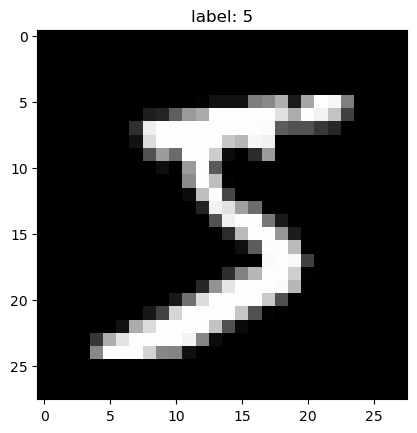

In [10]:
image = x_train[0]
label = y_train[0]

plt.imshow(image, cmap = 'gray')
plt.title('label: %s' %label)
plt.show()

In [11]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [12]:
cnn_model.compile(optimizer = 'adam',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])

In [13]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [14]:
x_train_4d = x_train.reshape(-1,28,28,1)
x_test_4d = x_test.reshape(-1,28,28,1)
print('shape of x_train_4d:', x_train_4d.shape)
print('shape of x_test_4d:', x_test_4d.shape)

shape of x_train_4d: (60000, 28, 28, 1)
shape of x_test_4d: (10000, 28, 28, 1)


In [16]:
cnn_model.fit(x_train_4d, y_train, epochs = 1)

1875/1875 [==============================] - 31s 16ms/step - loss: 0.0566 - accuracy: 0.9828


In [17]:
cnn_model.evaluate(x_test_4d, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0598 - accuracy: 0.9816


[0.05981583148241043, 0.9815999865531921]

In [18]:
eval_data = x_test[500]
eval_data_label = y_test[500]
cnn_model(eval_data.reshape(-1,28,28,1))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[2.9166575e-11, 6.4522875e-12, 4.3673537e-11, 9.9999988e-01,
        6.6138336e-12, 7.8305796e-08, 4.0027516e-11, 3.3757522e-10,
        2.0551578e-10, 4.8101960e-11]], dtype=float32)>

In [19]:
print(eval_data_label)

3
